<a href="https://colab.research.google.com/github/Allen001822480/Info7374SpringTeam5/blob/Assignment1/Assignment1_PartA_DropoutLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://colab.research.google.com/drive/12b0DfvGAh8W5My7SdwF8hbd8sZpM7cFU

In [1]:

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout,SpatialDropout2D, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt

import os

Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 30
num_predictions = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-4)

In [0]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 35s 695us/step - loss: 1.6284 - acc: 0.4442 - val_loss: 1.2851 - val_acc: 0.5453
Epoch 2/30
50000/50000 [==============================] - 32s 632us/step - loss: 1.1884 - acc: 0.5918 - val_loss: 1.0607 - val_acc: 0.6387
Epoch 3/30
50000/50000 [==============================] - 31s 630us/step - loss: 1.0479 - acc: 0.6442 - val_loss: 0.9048 - val_acc: 0.6885
Epoch 4/30
50000/50000 [==============================] - 32s 633us/step - loss: 0.9602 - acc: 0.6748 - val_loss: 0.8404 - val_acc: 0.7215
Epoch 5/30
50000/50000 [==============================] - 32s 632us/step - loss: 0.8929 - acc: 0.7029 - val_loss: 0.7270 - val_acc: 0.7550
Epoch 6/30
50000/50000 [==============================] - 32s 631us/step - loss: 0.8309 - acc: 0.7215 - val_loss: 0.7387 - val_acc: 0.7488
Epoch 7/30
50000/50000 [==============================] - 32s 632us/step - loss: 0.7826 - acc: 0.7386 - val_loss: 0.

In [6]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 163us/step
Test loss: 0.5187427920103073
Test accuracy: 0.8443


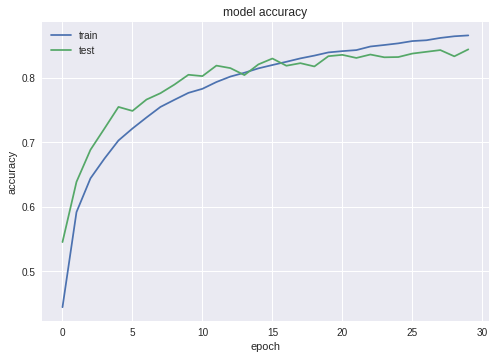

In [7]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

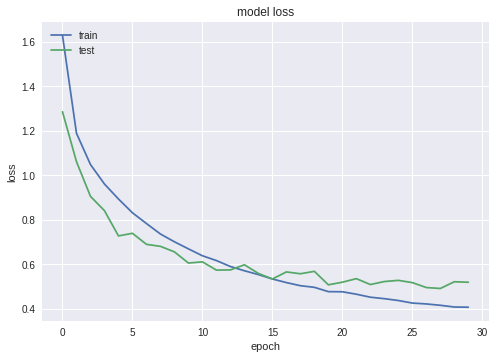

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:

#What if there is no batch regularization...

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-4)

In [4]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

hist2 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 26s 514us/step - loss: 1.8347 - acc: 0.3345 - val_loss: 1.5584 - val_acc: 0.4369
Epoch 2/30
50000/50000 [==============================] - 23s 460us/step - loss: 1.4992 - acc: 0.4681 - val_loss: 1.4556 - val_acc: 0.4972
Epoch 3/30
50000/50000 [==============================] - 23s 456us/step - loss: 1.4123 - acc: 0.5089 - val_loss: 1.2018 - val_acc: 0.5809
Epoch 4/30
50000/50000 [==============================] - 23s 455us/step - loss: 1.3835 - acc: 0.5223 - val_loss: 1.2105 - val_acc: 0.5679
Epoch 5/30
50000/50000 [==============================] - 23s 454us/step - loss: 1.3728 - acc: 0.5282 - val_loss: 1.2292 - val_acc: 0.5695
Epoch 6/30
50000/50000 [==============================] - 23s 454us/step - loss: 1.3489 - acc: 0.5384 - val_loss: 1.1737 - val_acc: 0.5972
Epoch 7/30
50000/50000 [==============================] - 23s 456us/step - loss: 1.3498 - acc: 0.5381 - val_loss: 1.

In [5]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 137us/step
Test loss: 1.4711775295257568
Test accuracy: 0.4861


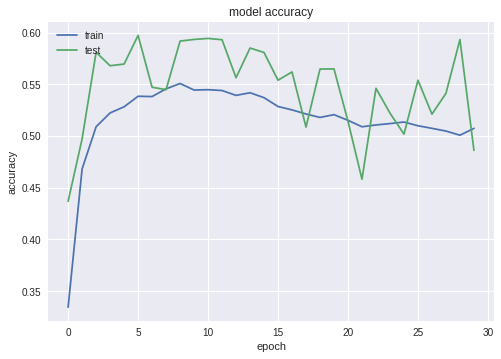

In [9]:
plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

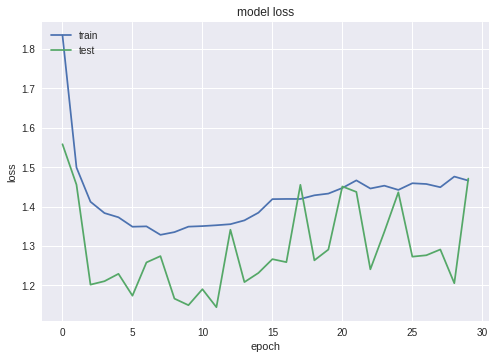

In [10]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#Using spatial dropout instead.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-4)

In [4]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

hist2 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 35s 706us/step - loss: 1.7760 - acc: 0.3868 - val_loss: 1.2729 - val_acc: 0.5351
Epoch 2/30
50000/50000 [==============================] - 32s 633us/step - loss: 1.3419 - acc: 0.5334 - val_loss: 1.0928 - val_acc: 0.6090
Epoch 3/30
50000/50000 [==============================] - 32s 638us/step - loss: 1.1828 - acc: 0.5930 - val_loss: 0.8831 - val_acc: 0.6947
Epoch 4/30
50000/50000 [==============================] - 32s 636us/step - loss: 1.0830 - acc: 0.6332 - val_loss: 0.8490 - val_acc: 0.7115
Epoch 5/30
50000/50000 [==============================] - 32s 635us/step - loss: 1.0109 - acc: 0.6575 - val_loss: 0.8674 - val_acc: 0.6990
Epoch 6/30
50000/50000 [==============================] - 32s 631us/step - loss: 0.9574 - acc: 0.6753 - val_loss: 0.7674 - val_acc: 0.7374
Epoch 7/30
50000/50000 [==============================] - 32s 637us/step - loss: 0.9028 - acc: 0.6946 - val_loss: 0.

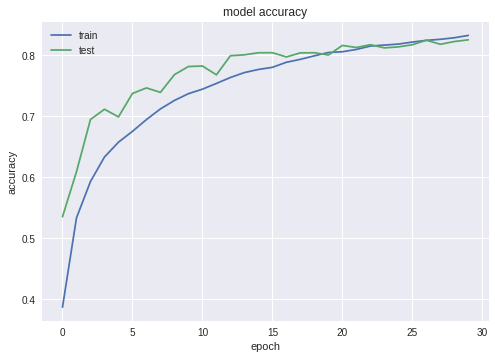

In [5]:
plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

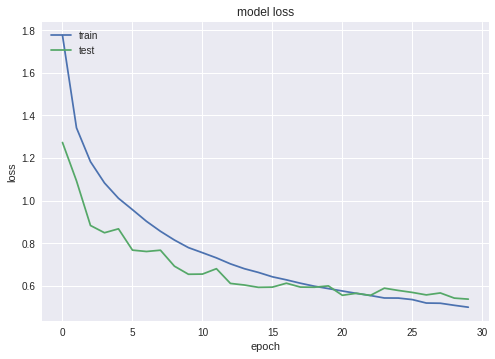

In [6]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()